# Metadata Explorer

__Description__: Opens the metadata file created by `PM-EventsTable.ipynb` or `distalEventsTable.ipynb` and explores the metadata associated with the excess rainfall calculation. 

__Input__: The metadata *.json file created by `PM-EventsTable.ipynb` or `distalEventsTable.ipynb`.

__Output__: User-specified metadata as a *.csv.

---



### Load Libraries:

In [1]:
import sys
sys.path.append('core')
from hydromet import*

### Specify the Filename and Path:

In [2]:
filename = 'Metadata_Augusta_P01'
#filename = 'Metadata_distal_Augusta_P01'
path = pl.Path(os.getcwd())/'Outputs'
#path = pl.Path(r'C:\Users\username\Documents\GitHub\pfra-hydromet\Outputs')

### Open the Metadata File and Extract Data:

---

In [3]:
with open(path/'{0}.json'.format(filename)) as f:
    metadata = json.load(f)

#### Extract the durations:

In [4]:
durations = list(metadata.keys())
print('Durations:', durations)

Durations: ['H06', 'H12', 'H24', 'H96']


#### Select a duration and extract the boundary condition names:

In [5]:
dur = durations[0] 
#dur = 'H06'

BCName = list(metadata[dur]['BCName'].keys())
print('Boundary condition names:', BCName)

Boundary condition names: ['D01']


#### Select a boundary condition name and extract the types of metadata available:

In [6]:
BCN = BCName[0]   
#BCN = 'D01'

scen = metadata[dur]['BCName'][BCN]
types = list(scen.keys())
print('Metadata types:', types)

Metadata types: ['groups', 'test_stat', 'precip', 'cum_excess', 'incr_excess', 'parameters', 'events_metadata']


#### Extract each type of metadata:

In [7]:
events_metadata = scen['events_metadata']
precip = scen['precip']
incr_excess = scen['incr_excess']
cum_excess = scen['cum_excess']
parameters = scen['parameters']
if 'distal' not in filename: test_stat = scen['test_stat']
groups = scen['groups']

### Explore Each Type of Metadata:
---
#### Events_metadata:
- The events_metadata dictionary contains the metadata associated with calculating the original excess rainfall events, including, but not limited to*, the following:
    - __TR__ : Recurrance Interval
    - __Rand Precipitation__ : The randomly selected precipitation amount
    - __Quartile__ : NOAA Atlas 14 temporal distribution quartile
    - __Decile__ : NOAA Atlas 14 decile for the specific quartile
    - __Random CN__ : The randomly selected curve number


- The 'keys' of the events_metadata dictionary are the metadata types, while the 'values' are the values for each metadata type.
- The events_metadata dictionary is transformed into a dataframe in order to explore the data more easily.
- *Contact sputnam@Dewberry.com for information about the metadata types not described above.

In [8]:
events_metadata_types = list(events_metadata.keys())
print('There are {0} types of metadata available, including {1}'.format(len(events_metadata_types), events_metadata_types))
events_metadata_df = pd.DataFrame.from_dict(events_metadata)
events_metadata_df = events_metadata_df.set_index('EventID')
events_metadata_df.head()

There are 24 types of metadata available, including ['Tr', 'Ann. Exc. Prob.', 'ARI', 'Log10_ARI', 'Expected Value', 'Lower (90%)', 'Upper (90%)', 'Quartile', 'Sigma', 'Fitted Lower (90%) Limit', 'Fitted Upper (90%) Limit', 'Random Precipitation', 'AMC I (Dry) CN', 'AMC II CN', 'AMC III (Wet) CN', 'alpha CN', 'beta CN', 'CN Lower Limit', 'Fitted AMC I (Dry) CN', 'Fitted AMC II CN', 'Fitted AMC III (Wet) CN', 'Random CN', 'Decile', 'EventID']


,Tr,Ann. Exc. Prob.,ARI,Log10_ARI,Expected Value,Lower (90%),Upper (90%),Quartile,Sigma,Fitted Lower (90%) Limit,...,AMC II CN,AMC III (Wet) CN,alpha CN,beta CN,CN Lower Limit,Fitted AMC I (Dry) CN,Fitted AMC II CN,Fitted AMC III (Wet) CN,Random CN,Decile
EventID,,,,,,,,,,,,,,,,,,,,,
E60001,2.000021,0.499995,1.442717,0.366528,2.395784,2.035598,2.847307,1,0.132158,2.022517,...,76.0,89.0,1.618599,2.353441,49.8333,58.00016,76.000355,88.996386,61,20
E60010,2.012411,0.496916,1.455606,0.375423,2.400303,2.039374,2.852737,1,0.132219,2.026175,...,76.0,89.0,1.618599,2.353441,49.8333,58.00016,76.000355,88.996386,73,80
E60100,2.115527,0.472695,1.562556,0.446323,2.436638,2.069721,2.896392,1,0.132369,2.056451,...,76.0,89.0,1.618599,2.353441,49.8333,58.00016,76.000355,88.996386,79,80
E61000,4.773926,0.209471,4.254356,1.447943,3.012788,2.549970,3.589510,1,0.134492,2.535796,...,76.0,89.0,1.618599,2.353441,49.8333,58.00016,76.000355,88.996386,59,40
E61001,4.775745,0.209391,4.256184,1.448373,3.013062,2.550198,3.589840,1,0.134493,2.536023,...,76.0,89.0,1.618599,2.353441,49.8333,58.00016,76.000355,88.996386,65,40


---
#### __Precip__:
- The precip dictionary contains the cumulative precipitation data for each of the original events.
- The 'keys' of the precip dictionary are the original event IDs, while the 'values' are dictionaries containing the index and cumulative precipitation for each event.
- The precip dictionary is transformed into a dataframe in order to explore the data more easily.

,E60001,E60002,E60003,E60004,E60005,E60006,E60007,E60008,E60009,E60010,...,E64960,E64961,E64962,E64963,E64964,E64965,E64966,E64967,E64968,E64969
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,0.659974,0.426892,0.416618,0.275491,0.855388,0.284579,0.341644,0.598118,0.616069,0.251301,...,0.408430,0.197598,0.070140,0.155167,0.275348,0.242313,0.401106,0.195573,0.126077,0.281443
1.0,1.273814,0.825690,0.816826,0.593306,1.572476,0.612878,0.687210,1.156875,1.190585,0.541209,...,0.809997,0.402895,0.140849,0.316379,0.554234,0.480553,0.801609,0.398766,0.257065,0.574295
1.5,1.773568,1.322407,1.343069,1.086387,1.971054,1.122224,1.152613,1.852825,1.773063,0.990992,...,1.227866,0.639842,0.274856,0.502445,0.855064,0.728465,1.210556,0.633284,0.408248,0.899476
2.0,2.094464,1.733624,1.817575,1.430426,2.137367,1.477613,1.590998,2.428980,2.215209,1.304823,...,1.608839,0.862246,0.348987,0.677092,1.137490,0.954488,1.556773,0.853409,0.550152,1.225607


None


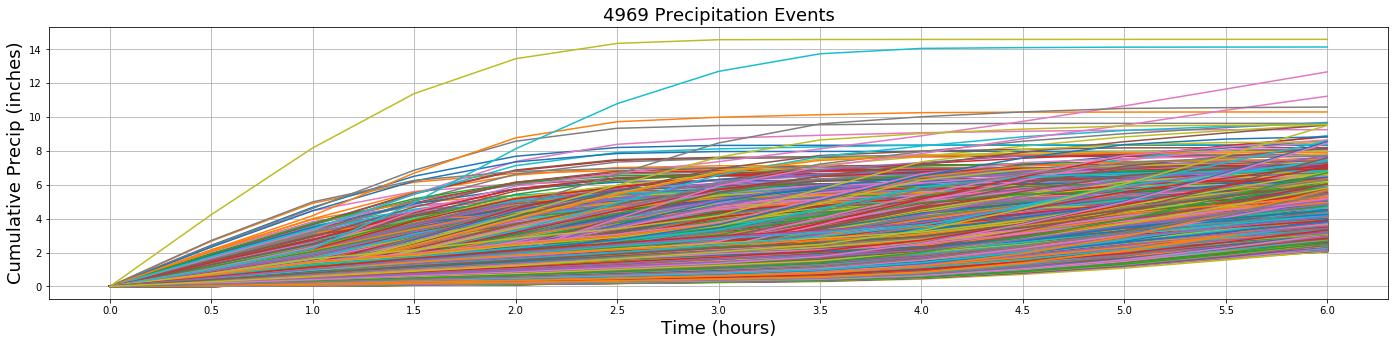

In [9]:
precip_df = pd.DataFrame.from_dict(precip)

print(display(precip_df.head()))

plot_cum_precip_or_excess(precip_df)

---
#### __Cum_excess__:
- The cum_excess dictionary contains the cumulative excess rainfall data for each of the original events.
- The 'keys' of the cum_excess dictionary are the original event IDs, while the 'values' are dictionaries containing the index and cumulative excess rainfall for each event.
- The cum_excess dictionary is transformed into a dataframe in order to explore the data more easily.

,E60001,E60002,E60003,E60004,E60005,E60006,E60007,E60008,E60009,E60010,...,E64960,E64961,E64962,E64963,E64964,E64965,E64966,E64967,E64968,E64969
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
0.5,0.000000,0.002974,0.000000,0.000000,0.000359,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.230006,0.0,0.0,0.000000
1.0,0.000000,0.099887,0.000000,0.000000,0.117951,0.000000,0.018550,0.003035,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.599876,0.0,0.0,0.000000
1.5,0.035554,0.343747,0.031622,0.016679,0.254277,0.028026,0.154215,0.113247,0.00000,0.015984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.995974,0.0,0.0,0.003693
2.0,0.092311,0.606057,0.137592,0.080121,0.322597,0.106733,0.362959,0.298663,0.02095,0.074896,...,0.0,0.0,0.0,0.0,0.0,0.0,1.336090,0.0,0.0,0.046245


None


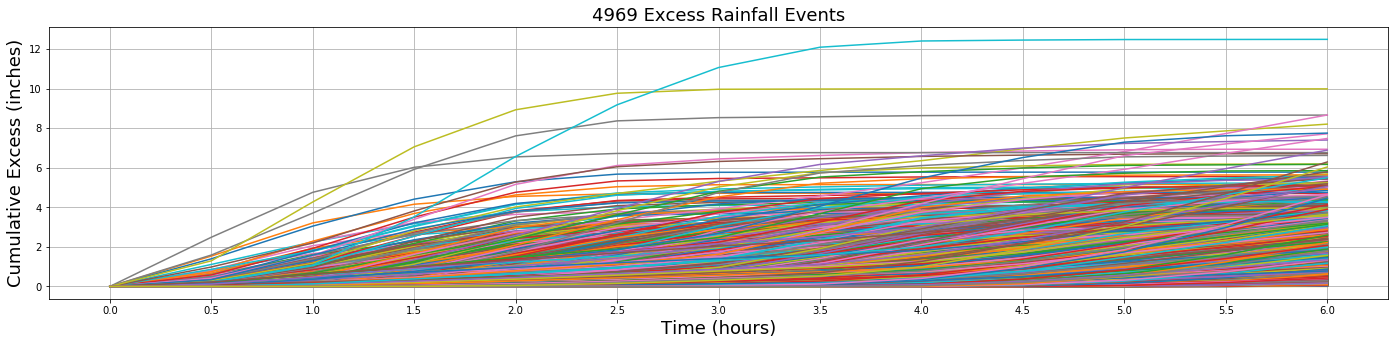

In [10]:
cum_excess_df = pd.DataFrame.from_dict(cum_excess)

print(display(cum_excess_df.head()))

plot_cum_precip_or_excess(cum_excess_df, 'Excess')

---
#### __Incr_excess__:
- The incr_excess dictionary contains the incremental excess rainfall data for each of the original events.
- The 'keys' of the incr_excess dictionary are the original event IDs, while the 'values' are dictionaries containing the index and incremental excess rainfall for each event.
- The incr_excess dictionary is transformed into a dataframe in order to explore the data more easily.

,E60001,E60002,E60003,E60004,E60005,E60006,E60007,E60008,E60009,E60010,...,E64960,E64961,E64962,E64963,E64964,E64965,E64966,E64967,E64968,E64969
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,0.013230,0.002974,0.009809,0.004230,0.000359,0.007107,0.009222,0.001569,0.005826,0.004053,...,0.002133,0.000250,0.000276,0.000533,0.000022,0.000389,0.230006,0.000974,0.002603,0.001155
1.0,0.012305,0.096912,0.009423,0.004879,0.117592,0.008199,0.009328,0.001466,0.005433,0.004676,...,0.002097,0.000260,0.000278,0.000554,0.000023,0.000382,0.369871,0.001012,0.002704,0.001202
1.5,0.010018,0.243861,0.012390,0.007570,0.136325,0.012720,0.135665,0.110212,0.005509,0.007255,...,0.002182,0.000300,0.000527,0.000639,0.000024,0.000398,0.396098,0.001168,0.003121,0.001335
2.0,0.056757,0.262310,0.105970,0.063442,0.068321,0.078707,0.208744,0.185416,0.004181,0.058912,...,0.001989,0.000281,0.000292,0.000600,0.000023,0.000363,0.340115,0.001096,0.002929,0.042552


None


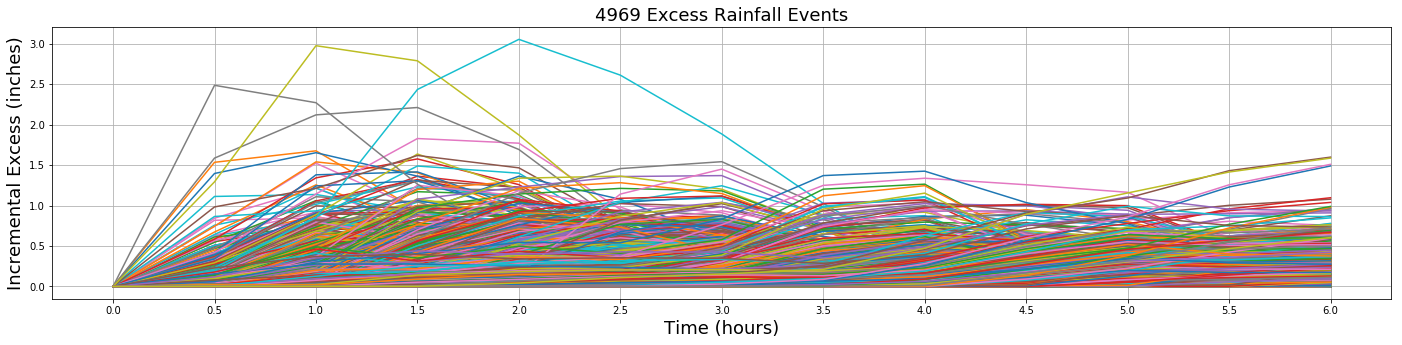

In [11]:
incr_excess_df = pd.DataFrame.from_dict(incr_excess)

print(display(incr_excess_df.head()))

plot_incr_excess(incr_excess_df)

---
#### Parameters:
- The parameters dictionary contains the random number generator seed and the convolution parameters used in grouping the individual excess rainfall events.

In [12]:
seed = parameters['seed']
tempEpsilon = parameters['tempEpsilon']
tempEpsilon2 = parameters['tempEpsilon2']
convEpsilon = parameters['convEpsilon']
volEpsilon = parameters['volEpsilon']

print('Seed: {0}\nConvolution parameters: tempEpsilon: {1} hours, tempEpsilon2: {2} hours, ' 
      'convEpsilon: {3}, volEpsilon: {4}'.format(seed, tempEpsilon, tempEpsilon2, convEpsilon, volEpsilon))

Seed: 3537
Convolution parameters: tempEpsilon: 1 hours, tempEpsilon2: 0.5 hours, convEpsilon: 163.64, volEpsilon: 163.64


---
#### __Groups__:
- The groups dictionary contains the IDs of the individual excess rainfall events that were grouped in order to form the final/mean events. 
- The 'keys' of the groups dictionary are the final event IDs, while the 'values' are the original event IDs.

In [13]:
final_events = list(groups.keys())
n_final_events = len(final_events)

print('There are {0} final/mean events for the {1} duration and the {2} boundary condition, including '.format(n_final_events, dur, BCN))
if n_final_events>20:
    print(final_events[:20],'...')
else:
    print(final_events)

There are 200 final/mean events for the H06 duration and the D01 boundary condition, including 
['E0001', 'E0002', 'E0003', 'E0004', 'E0005', 'E0006', 'E0007', 'E0008', 'E0009', 'E0010', 'E0011', 'E0012', 'E0013', 'E0014', 'E0015', 'E0016', 'E0017', 'E0018', 'E0019', 'E0020'] ...


##### Select a specific final event and extract the original event IDs:

In [14]:
final_event = final_events[0] 
#final_event = 'E0001'
original_events = list(groups[final_event])
n_original_events = len(original_events)

print('{0} is the average of {1} individual excess rainfall events, including:'.format(final_event, n_original_events))    
if n_original_events>20:
    print(original_events[:20],'...')
else:
    print(original_events)

E0001 is the average of 167 individual excess rainfall events, including:
['E61813', 'E61921', 'E61896', 'E62696', 'E61988', 'E62703', 'E62386', 'E62500', 'E62237', 'E62880', 'E62325', 'E62739', 'E62357', 'E62389', 'E62261', 'E62270', 'E62257', 'E62600', 'E62531', 'E62993'] ...


---
#### __Test_stat__:
- The test_stat dictionary contains the final value of the test statistic for each individual excess rainfall event and its corresponding final/mean event. This test statistic is a quantatiative measure of the similarity between the original excess rainfall curve and the final/mean excess rainfall curve. See the `Convolution_Parameters.ipynb` for additional details about interpreting the test statistic values. 
- The 'keys' of the test_stat dictionary are the final event IDs, while the 'values' are the test statistics for the individual excess rainfall events that were grouped in order to form the final/mean event.
- The test statistics for the final event specified above are shown below. 

In [15]:
if 'distal' not in filename:
    event_test_stats = list(test_stat[final_event])
    max_test_stat = max(event_test_stats)
    min_test_stat = min(event_test_stats)

    print('For final event: {0} the maximum test statistic is {1}, while the minimum is {2}.'.format(final_event, max_test_stat, min_test_stat))   

For final event: E0001 the maximum test statistic is 0.712801, while the minimum is -0.131441.


---
### Save select data to csv:

#### From a dataframe (events_metadata_df, precip_df, incr_excess_df, cum_excess_df):
- Specify the type of metadata to be saved (the type of metadata will be appended to the original metadata filename when saved as a .csv).
- Specify the corresponding dataframe to save by typing the dataframe name in front of '.to_csv'. 
- Execute the cell (shift+enter).

In [16]:
metadata_type = 'Events_Metadata'

events_metadata_df.to_csv(path/'{0}_{1}.csv'.format(metadata_type, filename))

#### From a dictionary (parameters, groups, test_stat):
- Specify the type of metadata to be saved (the type of metadata will be appended to the original metadata filename when saved as a .csv).
- Specify the corresponding dataframe to save by typing the dataframe name in the function 'dict_to_df.
- Execute the cell (shift+enter).

In [17]:
metadata_type = 'groups'

df = dict_to_df(groups, display_head=True)

df.to_csv(path/'{0}_{1}.csv'.format(metadata_type, filename))        

,E0001,E0002,E0003,E0004,E0005,E0006,E0007,E0008,E0009,E0010,...,E0191,E0192,E0193,E0194,E0195,E0196,E0197,E0198,E0199,E0200
0,E61813,E63469,E60614,E60329,E60497,E60469,E61030,E62090,E61532,E63428,...,E64743,E63406,E63879,E64284,E64049,E64375,E61630,E64376,E61738,E63370
1,E61921,E63966,E61218,E60521,E60945,E60760,E61388,E62937,E61610,E64034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E61896,E63605,E60619,E60860,E60581,E60143,E60535,E62714,E61351,E63711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E62696,E63774,E60894,E61107,E61052,E60154,E61006,E62734,E61428,E63797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E61988,E64407,E60141,E60217,E60140,E60841,E60298,E61947,E61137,E63423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None


---
# End